In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureEMOVO.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,labels,speaker
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346,1,1,1
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532,1,1,1
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368,1,1,1
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126,1,1,1
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686,2,7,6
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550,2,7,6
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411,2,7,6
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469,2,7,6


In [3]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [4]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

19/19 [==============================] - 0s 2ms/step


In [5]:
print(gender_predictions)

[[9.98367429e-01]
 [9.99417067e-01]
 [9.99153256e-01]
 [9.97986197e-01]
 [9.92271066e-01]
 [9.98940945e-01]
 [9.96494055e-01]
 [9.98897195e-01]
 [9.95219350e-01]
 [9.96798933e-01]
 [9.99428034e-01]
 [9.99318480e-01]
 [9.93348897e-01]
 [9.99549985e-01]
 [9.99465704e-01]
 [9.99659538e-01]
 [9.99642372e-01]
 [9.99578953e-01]
 [9.99505818e-01]
 [9.99619424e-01]
 [9.99700248e-01]
 [9.99650598e-01]
 [9.99623716e-01]
 [9.98801708e-01]
 [9.99647975e-01]
 [9.99607801e-01]
 [9.99700725e-01]
 [9.99512911e-01]
 [9.99270916e-01]
 [9.99423981e-01]
 [9.99580562e-01]
 [9.99426842e-01]
 [9.95470107e-01]
 [9.99712288e-01]
 [9.99673665e-01]
 [9.99451041e-01]
 [9.99557972e-01]
 [9.99352992e-01]
 [9.99700546e-01]
 [9.99632776e-01]
 [9.99672234e-01]
 [9.99674976e-01]
 [9.99591231e-01]
 [9.99022663e-01]
 [9.99614298e-01]
 [9.99054790e-01]
 [9.98796940e-01]
 [9.99481261e-01]
 [9.99640524e-01]
 [9.99678731e-01]
 [9.99686539e-01]
 [9.99652088e-01]
 [9.99785542e-01]
 [9.99692261e-01]
 [9.99310017e-01]
 [9.995431

In [6]:
male_rows = gender_predictions.flatten() >= 0.5  # 0 for Male, 1 for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} female samples.")

Filtered dataset contains 293 female samples.


In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,labels,speaker
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346,1,1,1
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532,1,1,1
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368,1,1,1
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126,1,1,1
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-512.075012,81.261253,14.769177,44.970119,1.124721,0.243847,-19.363283,4.484537,-6.476753,8.653331,...,34.448120,-0.011523,0.041373,-0.024520,0.004038,-0.002733,-0.026922,1,7,3
290,-537.805115,74.499825,16.144732,41.413177,0.090658,4.300513,-14.244553,5.471502,-5.960288,9.901382,...,34.392908,-0.003668,0.055127,-0.018462,-0.017223,-0.005943,-0.015435,1,7,3
291,-564.110962,84.495499,19.121347,53.239677,3.447273,9.294318,-18.866158,7.873207,-4.900262,7.340342,...,32.837789,0.042722,0.025001,-0.008568,-0.125956,-0.019678,0.001777,1,7,3
292,-596.333252,73.893417,15.403625,41.073212,1.869733,11.873602,-11.927804,11.471960,-4.937204,11.824884,...,32.617960,-0.010603,-0.008930,-0.032430,-0.074292,-0.006063,-0.013062,1,7,3


In [8]:
data.iloc[:,-3] == 1

0       True
1       True
2       True
3       True
4       True
       ...  
583    False
584    False
585    False
586    False
587    False
Name: gender, Length: 588, dtype: bool

In [9]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [10]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,17.334037,17.539159,17.562779,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,16.263369,17.699334,19.162629,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,18.860587,18.714656,19.843059,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,15.868680,18.698590,19.053175,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,16.198743,17.339091,18.793145,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-512.075012,81.261253,14.769177,44.970119,1.124721,0.243847,-19.363283,4.484537,-6.476753,8.653331,...,17.096065,16.064563,18.282166,34.448120,-0.011523,0.041373,-0.024520,0.004038,-0.002733,-0.026922
290,-537.805115,74.499825,16.144732,41.413177,0.090658,4.300513,-14.244553,5.471502,-5.960288,9.901382,...,16.241398,15.746897,17.595882,34.392908,-0.003668,0.055127,-0.018462,-0.017223,-0.005943,-0.015435
291,-564.110962,84.495499,19.121347,53.239677,3.447273,9.294318,-18.866158,7.873207,-4.900262,7.340342,...,15.380592,15.405968,17.496630,32.837789,0.042722,0.025001,-0.008568,-0.125956,-0.019678,0.001777
292,-596.333252,73.893417,15.403625,41.073212,1.869733,11.873602,-11.927804,11.471960,-4.937204,11.824884,...,15.167482,15.816087,16.013140,32.617960,-0.010603,-0.008930,-0.032430,-0.074292,-0.006063,-0.013062


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
289    7
290    7
291    7
292    7
293    7
Name: labels, Length: 293, dtype: int64

In [12]:
X_speaker

0      1
1      1
2      1
3      1
4      1
      ..
289    3
290    3
291    3
292    3
293    3
Name: speaker, Length: 293, dtype: int64

In [13]:
X.shape, y.shape

((293, 193), (293,))

In [14]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [15]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
84,-453.831665,75.665146,5.823720,30.844810,6.042925,-0.197116,-11.119115,12.453388,-0.400404,4.712238,...,14.758724,15.473366,17.762782,33.030419,0.013788,-0.004005,-0.029462,0.000307,-0.003503,-0.014484
261,-361.907593,64.413483,-69.818825,5.458014,-22.811913,-20.750097,-16.863075,0.161085,-30.165892,8.593779,...,20.262439,20.243523,22.052062,36.845911,-0.002936,0.033041,-0.016694,-0.086253,0.015828,-0.001420
45,-411.241425,84.359718,2.478460,25.567778,-14.586138,-9.376553,4.810165,15.866587,-14.695671,3.085657,...,17.612056,16.786226,19.655118,32.279342,-0.006873,0.002932,0.018075,0.012286,0.005246,-0.001184
177,-331.363983,89.150360,-38.291737,14.051342,-10.276723,-13.542343,-19.879133,-0.927071,-16.416380,0.924913,...,18.384978,18.161563,20.374909,33.302395,0.002109,-0.029464,-0.104190,0.015341,0.011147,-0.041672
143,-300.268188,65.574814,-24.355186,10.245623,-6.066051,5.699439,-24.732513,1.475259,-7.115409,9.058989,...,18.446873,19.136524,17.726159,35.381508,0.009979,0.035018,-0.082265,0.030752,0.007949,-0.008214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-368.674652,106.837563,2.016216,18.013720,-10.824872,-0.441077,-21.728945,3.377672,-16.225363,3.476242,...,19.007169,18.002102,17.551626,36.524341,0.006643,-0.026936,-0.050111,-0.018759,-0.009417,0.007414
71,-483.981812,48.379009,14.355464,43.422832,-13.121336,-6.838452,-2.321568,14.630364,-14.400576,-1.943750,...,17.188606,17.620220,18.394488,33.857580,0.019633,0.047134,-0.041484,-0.017645,0.009781,0.021665
106,-344.833313,72.097519,-15.943831,36.209465,-5.945903,-10.347607,-26.619682,-1.246971,-12.959381,-1.500720,...,19.143630,19.550646,18.435443,35.547995,0.024208,-0.016256,0.009379,-0.058329,-0.003104,-0.028892
271,-471.443481,92.525581,9.990037,28.500605,-5.359939,-10.991655,-8.981169,-0.118140,-13.651859,1.317755,...,18.226646,16.918699,17.992836,34.854507,-0.031267,0.019735,0.044551,-0.034158,-0.011660,-0.011374


In [16]:
X_speaker

84     1
261    3
45     1
177    2
143    2
      ..
189    2
71     1
106    2
271    3
102    2
Name: speaker, Length: 293, dtype: int64

In [17]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [18]:
y1

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
X.shape, y1.shape

((293, 193), (293, 7))

In [20]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [21]:
X2.shape, X2_speaker.shape, y2.shape

((293, 193), (293,), (293,))

In [22]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [23]:
import random, numpy as np
from keras import optimizers
kfold=3
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [24]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-453.831665,75.665146,5.823720,30.844810,6.042925,-0.197116,-11.119115,12.453388,-0.400404,4.712238,...,14.758724,15.473366,17.762782,33.030419,0.013788,-0.004005,-0.029462,0.000307,-0.003503,-0.014484
1,-361.907593,64.413483,-69.818825,5.458014,-22.811913,-20.750097,-16.863075,0.161085,-30.165892,8.593779,...,20.262439,20.243523,22.052062,36.845911,-0.002936,0.033041,-0.016694,-0.086253,0.015828,-0.001420
2,-411.241425,84.359718,2.478460,25.567778,-14.586138,-9.376553,4.810165,15.866587,-14.695671,3.085657,...,17.612056,16.786226,19.655118,32.279342,-0.006873,0.002932,0.018075,0.012286,0.005246,-0.001184
3,-331.363983,89.150360,-38.291737,14.051342,-10.276723,-13.542343,-19.879133,-0.927071,-16.416380,0.924913,...,18.384978,18.161563,20.374909,33.302395,0.002109,-0.029464,-0.104190,0.015341,0.011147,-0.041672
4,-300.268188,65.574814,-24.355186,10.245623,-6.066051,5.699439,-24.732513,1.475259,-7.115409,9.058989,...,18.446873,19.136524,17.726159,35.381508,0.009979,0.035018,-0.082265,0.030752,0.007949,-0.008214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,-368.674652,106.837563,2.016216,18.013720,-10.824872,-0.441077,-21.728945,3.377672,-16.225363,3.476242,...,19.007169,18.002102,17.551626,36.524341,0.006643,-0.026936,-0.050111,-0.018759,-0.009417,0.007414
289,-483.981812,48.379009,14.355464,43.422832,-13.121336,-6.838452,-2.321568,14.630364,-14.400576,-1.943750,...,17.188606,17.620220,18.394488,33.857580,0.019633,0.047134,-0.041484,-0.017645,0.009781,0.021665
290,-344.833313,72.097519,-15.943831,36.209465,-5.945903,-10.347607,-26.619682,-1.246971,-12.959381,-1.500720,...,19.143630,19.550646,18.435443,35.547995,0.024208,-0.016256,0.009379,-0.058329,-0.003104,-0.028892
291,-471.443481,92.525581,9.990037,28.500605,-5.359939,-10.991655,-8.981169,-0.118140,-13.651859,1.317755,...,18.226646,16.918699,17.992836,34.854507,-0.031267,0.019735,0.044551,-0.034158,-0.011660,-0.011374


In [25]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,1
1,3
2,1
3,2
4,2
...,...
288,2
289,1
290,2
291,3


In [26]:
speakers = X_speaker.unique()
speakers

array([1, 3, 2], dtype=int64)

In [27]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,1
1,3
2,1
3,2
4,2
...,...
288,2
289,1
290,2
291,3


In [28]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-453.831665,75.665146,5.823720,30.844810,6.042925,-0.197116,-11.119115,12.453388,-0.400404,4.712238,...,15.473366,17.762782,33.030419,0.013788,-0.004005,-0.029462,0.000307,-0.003503,-0.014484,1
1,-361.907593,64.413483,-69.818825,5.458014,-22.811913,-20.750097,-16.863075,0.161085,-30.165892,8.593779,...,20.243523,22.052062,36.845911,-0.002936,0.033041,-0.016694,-0.086253,0.015828,-0.001420,3
2,-411.241425,84.359718,2.478460,25.567778,-14.586138,-9.376553,4.810165,15.866587,-14.695671,3.085657,...,16.786226,19.655118,32.279342,-0.006873,0.002932,0.018075,0.012286,0.005246,-0.001184,1
3,-331.363983,89.150360,-38.291737,14.051342,-10.276723,-13.542343,-19.879133,-0.927071,-16.416380,0.924913,...,18.161563,20.374909,33.302395,0.002109,-0.029464,-0.104190,0.015341,0.011147,-0.041672,2
4,-300.268188,65.574814,-24.355186,10.245623,-6.066051,5.699439,-24.732513,1.475259,-7.115409,9.058989,...,19.136524,17.726159,35.381508,0.009979,0.035018,-0.082265,0.030752,0.007949,-0.008214,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,-368.674652,106.837563,2.016216,18.013720,-10.824872,-0.441077,-21.728945,3.377672,-16.225363,3.476242,...,18.002102,17.551626,36.524341,0.006643,-0.026936,-0.050111,-0.018759,-0.009417,0.007414,2
289,-483.981812,48.379009,14.355464,43.422832,-13.121336,-6.838452,-2.321568,14.630364,-14.400576,-1.943750,...,17.620220,18.394488,33.857580,0.019633,0.047134,-0.041484,-0.017645,0.009781,0.021665,1
290,-344.833313,72.097519,-15.943831,36.209465,-5.945903,-10.347607,-26.619682,-1.246971,-12.959381,-1.500720,...,19.550646,18.435443,35.547995,0.024208,-0.016256,0.009379,-0.058329,-0.003104,-0.028892,2
291,-471.443481,92.525581,9.990037,28.500605,-5.359939,-10.991655,-8.981169,-0.118140,-13.651859,1.317755,...,16.918699,17.992836,34.854507,-0.031267,0.019735,0.044551,-0.034158,-0.011660,-0.011374,3


In [29]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=291
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='EMOVO_speaker_female'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00005, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=700, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 1
Train speakers: [2 3]
No overlap in fold 0.
Selected FS indices: [ 33  15   0 129   1   3 137  86   4  64  44 119  81 188  53 156  24  35
   9  13  20  25  23  45  66  88 110 148 174  94 159 133 160 107  82  29
  56 135 172 191  83  61 111  31 116 168 167 177 175 100  41  96 109 140
 146 151 155  59  16  14  32  76 115  60  73  67  47  50  97 123  92  80
 101 106 112 114 102 139 158 122 130  79  65  62  55  84 125 163 162 189
 192 180 187 184 181 153 190 182 176 183 154 113  78  93  90 126 152 118
  72  38  69 108  74 104  87  63  43  49  58 105  77 103 120 124  57]
0
Epoch 1/700
7/7 [==============================] - 3s 145ms/step - loss: 2.0511 - accuracy: 0.2051 - val_loss: 2.0784 - val_accuracy: 0.1429
Epoch 2/700
7/7 [==============================] - 1s 119ms/step - loss: 1.7660 - accuracy: 0.3179 - val_loss: 1.9951 - val_accuracy: 0.1837
Epoch 3/700
7/7 [==============================] - 1s 92ms/step - loss: 1.6904 - accuracy: 0.3897 - val_loss: 1.9937 - v

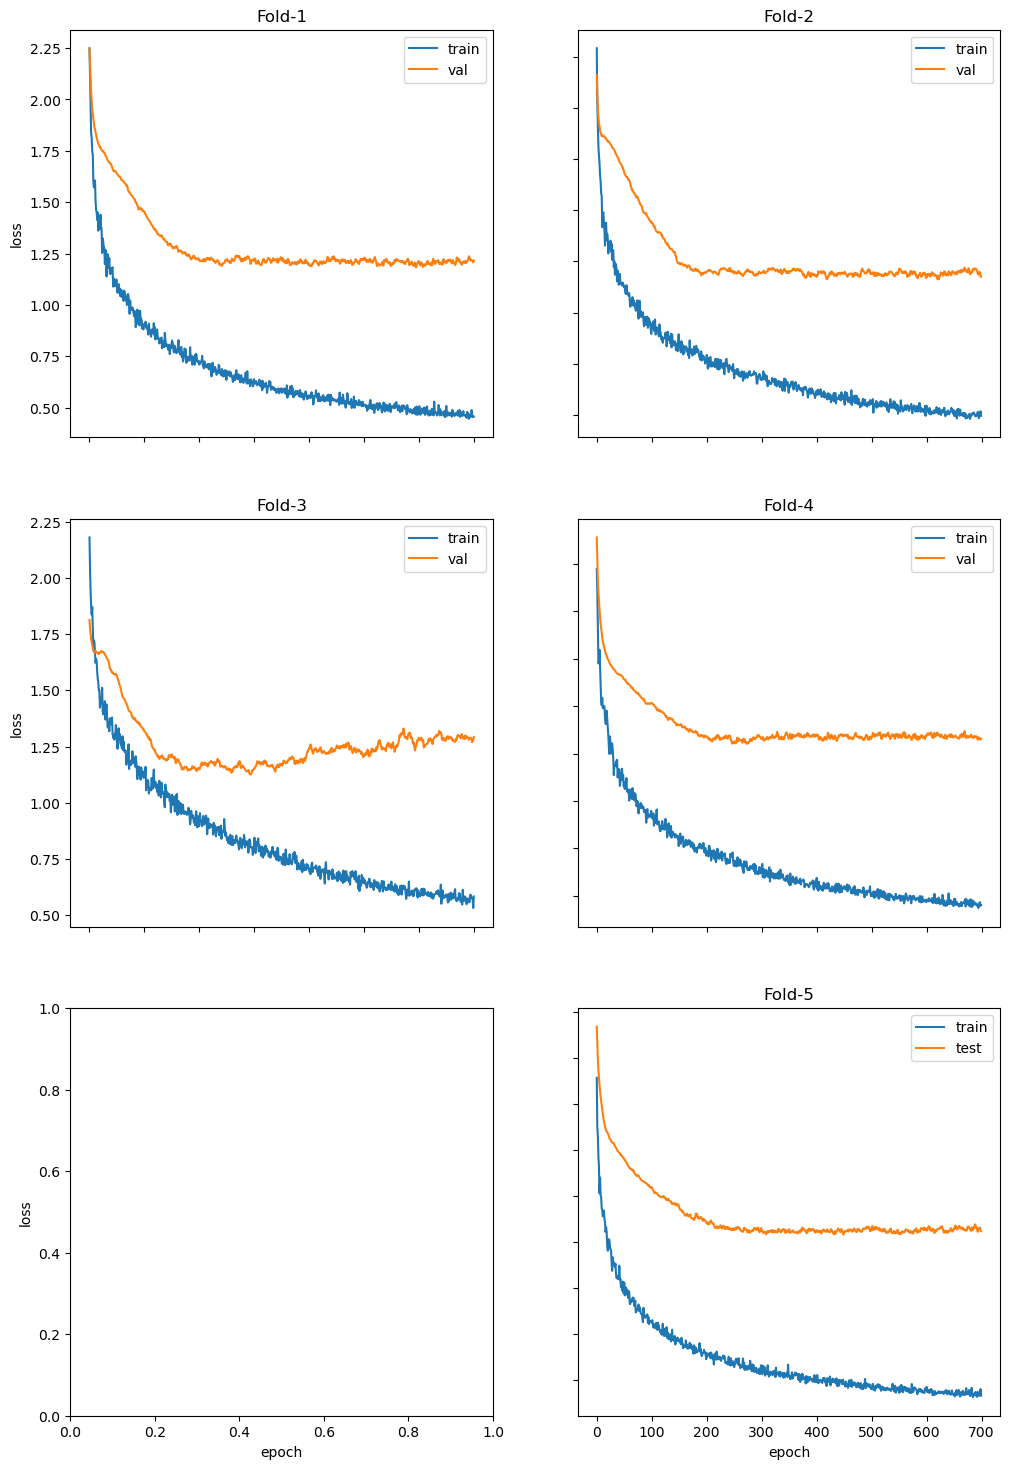

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [36]:
# loading json and creating model
from keras.models import model_from_json
savedir='EMOVO_speaker_female'
m='Model_1'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [37]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X1.npy')
yloaded=np.load(savedir+'/y1.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 37.76%


In [38]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

4/4 [==============================] - 0s 17ms/step
(98, 7)
98


array([[ 0,  0,  2,  8,  0,  0,  4],
       [ 4,  0,  2,  4,  4,  0,  0],
       [ 0,  1,  0, 11,  0,  0,  2],
       [ 1,  0,  0, 10,  0,  3,  0],
       [ 0,  0,  1,  0, 13,  0,  0],
       [ 4,  0,  1,  8,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14]], dtype=int64)

In [39]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[  0.    0.   14.3  57.1   0.    0.   28.6]
 [ 28.6   0.   14.3  28.6  28.6   0.    0. ]
 [  0.    7.1   0.   78.6   0.    0.   14.3]
 [  7.1   0.    0.   71.4   0.   21.4   0. ]
 [  0.    0.    7.1   0.   92.9   0.    0. ]
 [ 28.6   0.    7.1  57.1   7.1   0.    0. ]
 [  0.    0.    0.    0.    0.    0.  100. ]]


      dis  gio   neu   pau   rab   sor    tri
dis   0.0  0.0  14.3  57.1   0.0   0.0   28.6
gio  28.6  0.0  14.3  28.6  28.6   0.0    0.0
neu   0.0  7.1   0.0  78.6   0.0   0.0   14.3
pau   7.1  0.0   0.0  71.4   0.0  21.4    0.0
rab   0.0  0.0   7.1   0.0  92.9   0.0    0.0
sor  28.6  0.0   7.1  57.1   7.1   0.0    0.0
tri   0.0  0.0   0.0   0.0   0.0   0.0  100.0



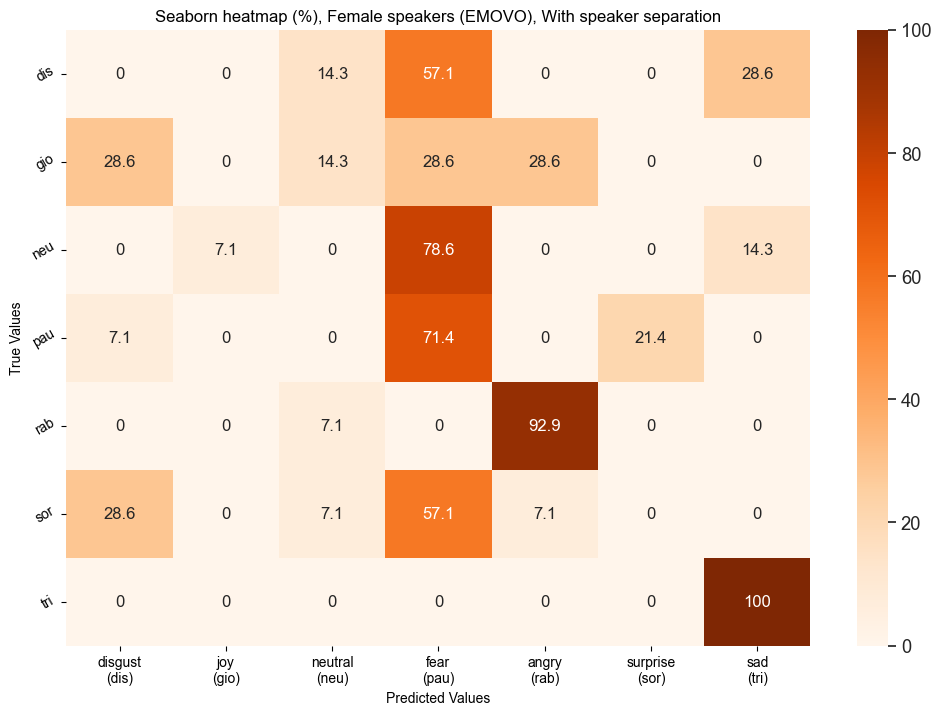

In [40]:
listik = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), Female speakers (EMOVO), With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_xticklabels(['disgust\n(dis)', 'joy\n(gio)', 'neutral\n(neu)','fear\n(pau)', 'angry\n(rab)', 'surprise\n(sor)', 'sad\n(tri)'])
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()